In [1]:
# Python ≥3.5 is required                 
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)
from sklearn.metrics import mean_squared_error as MSE
import seaborn 
from pandas.plotting import scatter_matrix
%matplotlib inline
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
FullTable = pd.DataFrame(pd.read_excel('newTable.xlsx'))
FullTable['Commit_score'] = pd.DataFrame(FullTable['Commit_score'], dtype = np.float64)
all_variables = pd.DataFrame(pd.read_excel('all_variables.xlsx'))
Accom_salary = pd.DataFrame(pd.read_excel('accom_salary.xlsx'))
Commit_salary = pd.DataFrame(pd.read_excel('commit_salary.xlsx'))
CommitsTable = pd.DataFrame(pd.read_excel('commits.xlsx'))
Prime_salary = pd.DataFrame(pd.read_excel('prime_salary.xlsx'))
Legacy_salary = pd.DataFrame(pd.read_excel('legacy_salary.xlsx'))

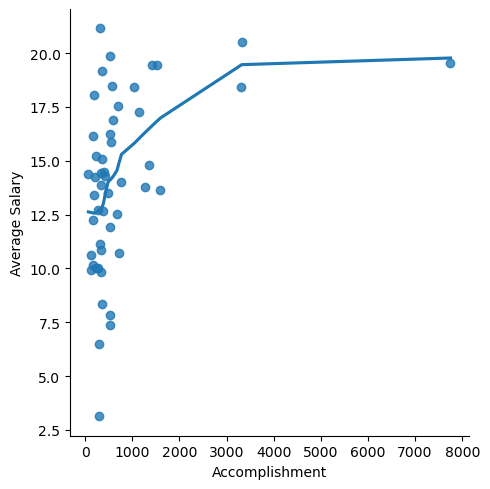

In [3]:
seaborn.lmplot(x='Accom_score', y='Avg_salary',
               data=FullTable,lowess=True).set(
    xlabel='Accomplishment', 
    ylabel='Average Salary')
#col='Player',hue='Player',col_wrap=3  

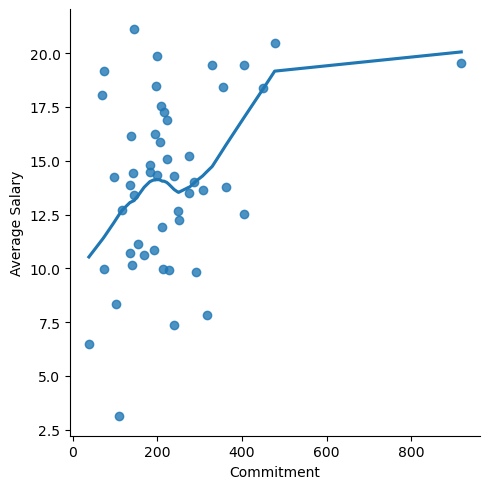

In [4]:
seaborn.lmplot(x='Commit_score', y='Avg_salary',
               data=FullTable,lowess=True).set(
    xlabel='Commitment', 
    ylabel='Average Salary')
#col='Player',hue='Player',col_wrap=3  

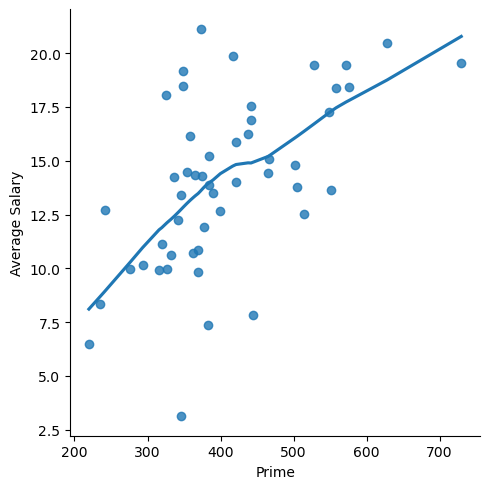

In [5]:
seaborn.lmplot(x='Prime_score', y='Avg_salary',
               data=FullTable,lowess=True).set(
    xlabel='Prime', 
    ylabel='Average Salary')
#col='Player',hue='Player',col_wrap=3  

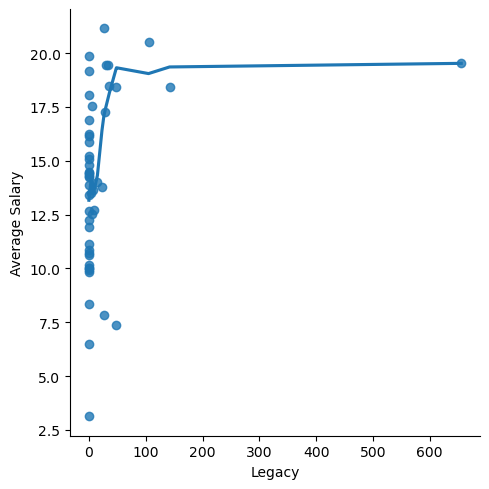

In [6]:
seaborn.lmplot(x='Legacy_score', y='Avg_salary',
               data=FullTable,lowess=True).set(
    xlabel='Legacy', 
    ylabel='Average Salary')
#col='Player',hue='Player',col_wrap=3  

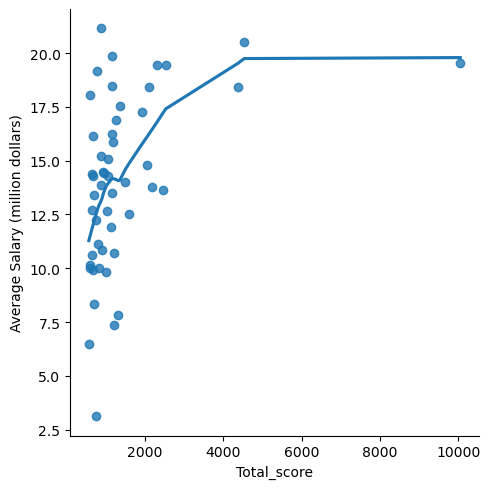

In [7]:
seaborn.lmplot(x='Total_score', y='Avg_salary',
               data=FullTable,lowess=True).set(
    xlabel='Total_score', 
    ylabel='Average Salary (million dollars)')
#col='Player',hue='Player',col_wrap=3  

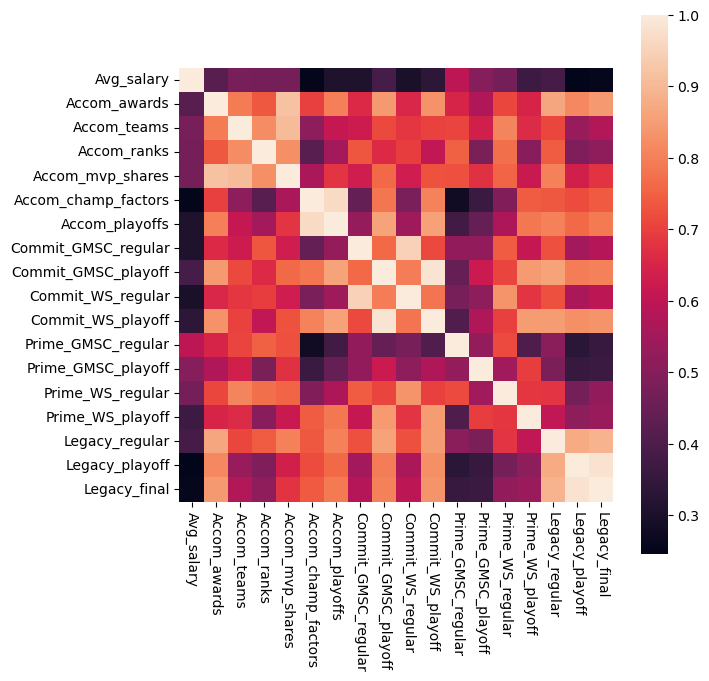

In [8]:
fig, ax = plt.subplots(figsize=(7,7))
seaborn.heatmap(all_variables.corr(), vmax=1, square=True)
#annot=True
plt.xticks(rotation=-90)
plt.yticks(rotation=0);

In [9]:
corr_matrix_full = all_variables.corr()
corr_matrix_avg_salary =  pd.DataFrame(corr_matrix_full['Avg_salary']).sort_values(by = 'Avg_salary', ascending = False)

In [10]:
terms_all = all_variables.columns.drop('Avg_salary')
terms_all = terms_all.drop('Player')
terms_all

X = MS(terms_all).fit_transform(all_variables[:40])
model = sm.OLS(all_variables['Avg_salary'][:40], X)
results = model.fit()
p_sorted = results.pvalues.sort_values(ascending = False)   #sort the varibales by p-value
summarize(results)
print('Average p-value is', sum(results.pvalues.values)/ len(summarize(results)))
print('Mean Squared Error is' , MSE(results.predict(), all_variables['Avg_salary'][:40])) 

Average p-value is 0.24862611106540816
Mean Squared Error is 6.363068735084814


In [11]:
def BackwardSelection(droppingTerms):   
    if(droppingTerms == []):
        print('Nothing was dropped')

    temp_terms = terms_all
    for i in range(len(droppingTerms)):
        temp_terms = temp_terms.drop(droppingTerms[i])
        print('[',droppingTerms[i],']','was dropped')
        i = i + 1    

    X_temp = MS(temp_terms).fit_transform(all_variables)
    model_temp = sm.OLS(all_variables['Avg_salary'], X_temp)
    results_temp = model_temp.fit()
    new_p_values = results_temp.pvalues.sort_values(ascending=False)

    yield  print('Average p-value is', sum(results_temp.pvalues.values)/ len(summarize(results_temp)))
    yield  print('Mean Squared Error is' , MSE(results_temp.predict(), all_variables['Avg_salary']))        
    yield  new_p_values
    yield  summarize(results_temp)

In [12]:
result0 = BackwardSelection([])
next(result0)
next(result0)
next(result0)
next(result0)

Nothing was dropped
Average p-value is 0.32382734776390565
Mean Squared Error is 6.804825655510524


,coef,std err,t,P>|t|
intercept,-13.51880,10.04800,-1.34500,0.18800
Accom_awards,0.00810,0.00900,0.91200,0.36900
Accom_teams,0.01290,0.01500,0.88500,0.38300
Accom_ranks,0.01050,0.01300,0.81800,0.41900
Accom_mvp_shares,-0.05950,0.03300,-1.78600,0.08400
Accom_champ_factors,13.38820,9.13500,1.46600,0.15300
Accom_playoffs,-0.09750,0.05400,-1.81900,0.07800
Commit_GMSC_regular,-0.11150,0.08900,-1.25600,0.21800
Commit_GMSC_playoff,0.38750,0.13700,2.82100,0.00800
Commit_WS_regular,0.00880,0.10400,0.08400,0.93300


In [13]:
drop9 = BackwardSelection(['Commit_WS_regular','Legacy_regular', 'Legacy_playoff', 
                       'Accom_awards', 'Accom_teams', 'Prime_GMSC_playoff', 
                       'Accom_ranks', 'Accom_mvp_shares', 'Prime_WS_regular'])
next(drop9)
next(drop9)  ## best case
next(drop9)  ## best case
next(drop9)  

[ Commit_WS_regular ] was dropped
[ Legacy_regular ] was dropped
[ Legacy_playoff ] was dropped
[ Accom_awards ] was dropped
[ Accom_teams ] was dropped
[ Prime_GMSC_playoff ] was dropped
[ Accom_ranks ] was dropped
[ Accom_mvp_shares ] was dropped
[ Prime_WS_regular ] was dropped
Average p-value is 0.07465893075970731
Mean Squared Error is 7.901664387942569


,coef,std err,t,P>|t|
intercept,-10.92450,8.33100,-1.31100,0.19700
Accom_champ_factors,11.95100,7.24600,1.64900,0.10700
Accom_playoffs,-0.08500,0.04000,-2.13400,0.03900
Commit_GMSC_regular,-0.06050,0.02500,-2.39000,0.02200
Commit_GMSC_playoff,0.29880,0.09800,3.04000,0.00400
Commit_WS_playoff,-0.24030,0.09100,-2.64700,0.01100
Prime_GMSC_regular,0.08570,0.02000,4.32200,0.00000
Prime_WS_playoff,0.05110,0.03300,1.53300,0.13300
Legacy_final,0.08380,0.05800,1.43400,0.15900


In [14]:
def ForwardSelection(AddingTerms):
    if(AddingTerms == []):
        print('Empty array')
        yield
    else:
        adding_terms = pd.DataFrame({})
        for i in range(len(AddingTerms)):
            adding_terms = adding_terms.append(pd.DataFrame({AddingTerms[i]: all_variables[AddingTerms[i]]}))

        X_temp = MS(adding_terms).fit_transform(all_variables)
        model_temp = sm.OLS(all_variables['Avg_salary'], X_temp)
        results_temp = model_temp.fit()
        new_p_values = results_temp.pvalues.sort_values(ascending=False)    

        yield  print('Average p-value is', sum(results_temp.pvalues.values)/ len(summarize(results_temp)))
        yield  print('Mean Squared Error is' , MSE(results_temp.predict(), all_variables['Avg_salary']))        
        yield  new_p_values.head()
        yield  summarize(results_temp)

In [15]:
in1 = ForwardSelection(['Prime_GMSC_regular', 'Commit_GMSC_playoff', 'Commit_WS_playoff',
                       'Commit_GMSC_regular', 'Accom_playoffs', 'Accom_champ_factors',
                       'Prime_WS_playoff', 'Legacy_final'])
next(in1)
next(in1)

Average p-value is 0.07465893075970606
Mean Squared Error is 7.901664387942571


In [16]:
import sklearn.linear_model as LM
def LMitWithAvgSalary(variable, sizeOfTrainSet):
    X_train_variable = np.c_[FullTable[variable][:sizeOfTrainSet]]
    Y_train_variable = np.c_[FullTable['Avg_salary'][:sizeOfTrainSet]]

    X_test_variable = pd.DataFrame(FullTable[variable][len(X_train_variable):])

    model_LM_variable = sklearn.linear_model.LinearRegression()
    abc = model_LM_variable.fit(X_train_variable, Y_train_variable)
    Y_test_variable_predict_LM = model_LM_variable.predict(X_test_variable)
    return Y_test_variable_predict_LM